In [11]:
# Load the dataset in streaming mode

from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", name="it", streaming=True, trust_remote_code=True)

In [12]:
# Take the first three examples from the training part

ds_head = ds['train'].take(3)

In [13]:
# Get the third example and explore it

example = list(ds_head)[-1]
example

{'audio_id': '20170516-0900-PLENARY-19-it_20170516-21:06:09_2',
 'language': 5,
 'audio': {'path': 'train_part_0/20170516-0900-PLENARY-19-it_20170516-21:06:09_2.wav',
  'array': array([-0.23910522, -0.28927612, -0.29464722, ...,  0.01391602,
         -0.03115845, -0.02081299]),
  'sampling_rate': 16000},
 'raw_text': "Tale malcontento fortissimo nei confronti del governo ha portato a una reazione scomposta, con una riduzione della libertà di espressione, l'attacco alle opposizioni e, in qualche modo, una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà.",
 'normalized_text': "tale malcontento fortissimo nei confronti del governo ha portato a una reazione scomposta con una riduzione della libertà di espressione l'attacco alle opposizioni e in qualche modo una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà.",
 'gender': 'male',
 'speaker_id': '124812',
 'is_gold_transcript': True,
 'accent': 'None'}

In [14]:
# Listen to the example's audio

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

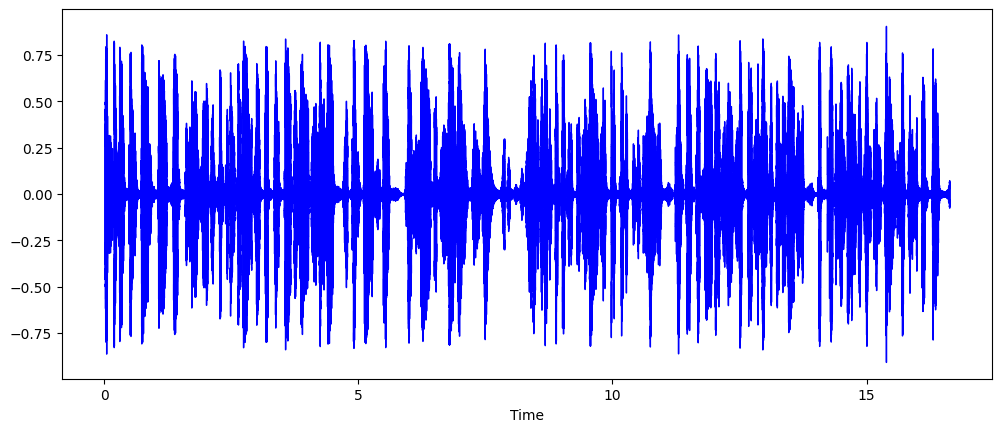

In [15]:
# Waveform

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate, color='blue')

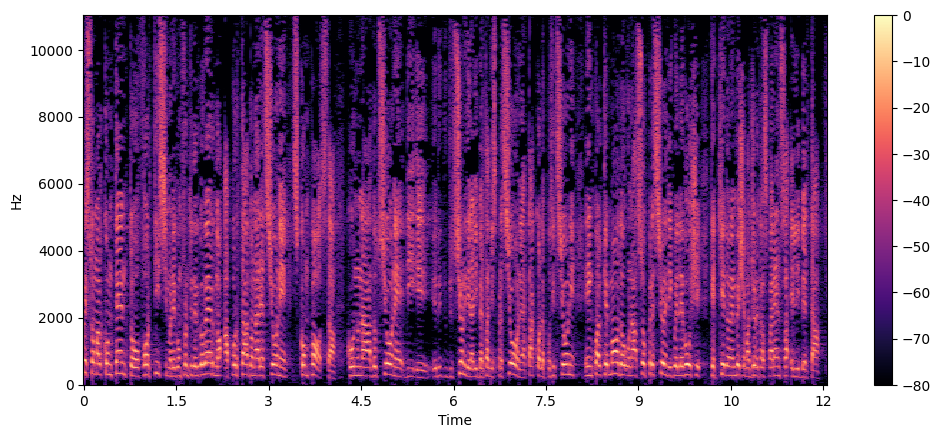

In [16]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [18]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-italian")

Some weights of the model checkpoint at facebook/wav2vec2-large-xlsr-53-italian were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53-italian and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should pr

In [19]:
# Compare the results

print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': "qesto malcontento fortissimo dei confronti del governo ha portata un'a reazione scomposta con una adozione di rididuzioni della libertà di espressione attacco alleapposizioni e in qualche modo una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà"}
Tale malcontento fortissimo nei confronti del governo ha portato a una reazione scomposta, con una riduzione della libertà di espressione, l'attacco alle opposizioni e, in qualche modo, una soppressione di quelle voci che chiedono invece maggiore trasparenza e libertà.


In [20]:
# Once again, listen to compare. Even though the output doesn't match exactly the provided transcription, the model actually does really well.
# You don't really hear the "Denn es gibt bio" part in the Audio.

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)